<a href="https://colab.research.google.com/github/kay31105/-/blob/main/%E6%9C%9F%E6%9C%AB%E5%A0%B1%E5%91%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install tensorflow
!pip install pandas-datareader
!apt install graphviz
!pip install pydot pydot-ng
!pip install yfinance
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 10.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found ex

In [14]:
import pandas as pd
from pandas_datareader import data
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()
import numpy as np
import seaborn as sns


In [15]:
df=pd.DataFrame()

In [16]:
tickers = ['2330.TW','2317.TW','2454.TW','2303.TW','2308.TW','2412.TW','1303.TW','2891.TW','2882.TW','2881.TW']

start_date = '2020-2-06'
end_date = '2022-6-13'
for t in tickers:
  df[t]=yf.download(t,start_date,end_date)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 2020-02-06 to 2022-06-10
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2330.TW  573 non-null    float64
 1   2317.TW  573 non-null    float64
 2   2454.TW  573 non-null    float64
 3   2303.TW  573 non-null    float64
 4   2308.TW  573 non-null    float64
 5   2412.TW  573 non-null    float64
 6   1303.TW  573 non-null    float64
 7   2891.TW  573 non-null    float64
 8   2882.TW  573 non-null    float64
 9   2881.TW  573 non-null    float64
dtypes: float64(10)
memory usage: 49.2 KB


檢查股票價格有無錯誤

In [18]:
df.head()

,2330.TW,2317.TW,2454.TW,2303.TW,2308.TW,2412.TW,1303.TW,2891.TW,2882.TW,2881.TW
Date,,,,,,,,,,
2020-02-06,332.5,83.599998,382.0,16.250000,147.0,108.5,70.300003,22.500000,41.500000,41.818180
2020-02-07,328.0,82.900002,381.0,16.350000,143.5,109.0,69.800003,22.500000,41.049999,41.272728
2020-02-10,327.5,82.000000,380.0,16.400000,143.0,109.0,69.900002,22.500000,40.900002,41.045452
2020-02-11,331.5,82.900002,390.0,16.700001,142.5,108.5,70.000000,22.549999,41.650002,41.818180
2020-02-12,335.0,85.500000,401.5,16.900000,144.0,108.5,69.800003,22.650000,41.799999,42.136364


In [19]:
df.tail()

,2330.TW,2317.TW,2454.TW,2303.TW,2308.TW,2412.TW,1303.TW,2891.TW,2882.TW,2881.TW
Date,,,,,,,,,,
2022-06-06,540.0,115.5,905.0,52.000000,239.0,126.0,84.599998,26.850000,54.799999,64.000000
2022-06-07,535.0,113.5,890.0,51.700001,233.0,125.5,84.300003,26.549999,54.799999,63.400002
2022-06-08,544.0,114.0,930.0,52.400002,234.5,126.5,84.500000,26.750000,54.799999,63.799999
2022-06-09,541.0,115.5,924.0,51.799999,235.0,126.0,84.800003,25.850000,54.799999,63.400002
2022-06-10,530.0,114.0,930.0,51.200001,237.0,125.0,84.699997,26.000000,54.799999,62.900002


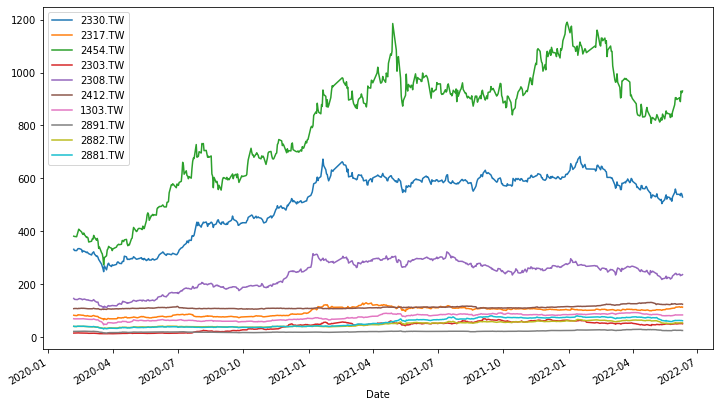

In [21]:
df.plot(figsize=(12,7))

將資料正規化，繪製股票走勢圖

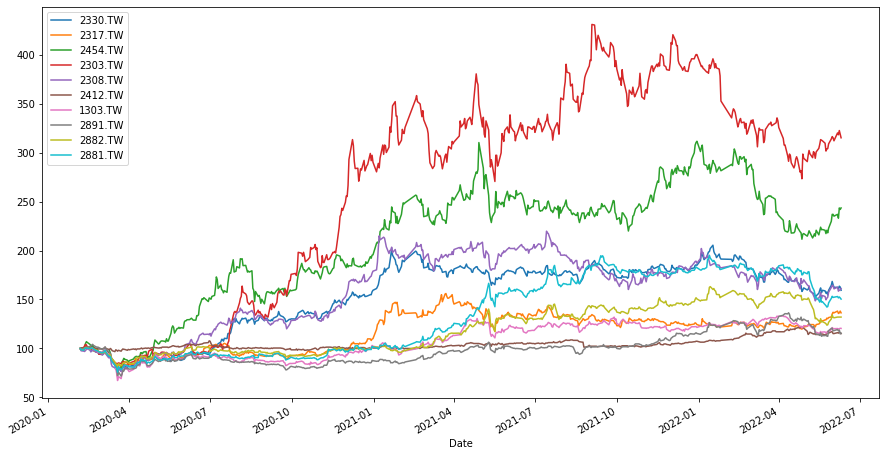

In [23]:
(df/df.iloc[0]*100).plot(figsize=(15,8))

In [ ]:
log_return=np.log(df/df.shift(1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4a7c97fd0>,
      dtype=object)

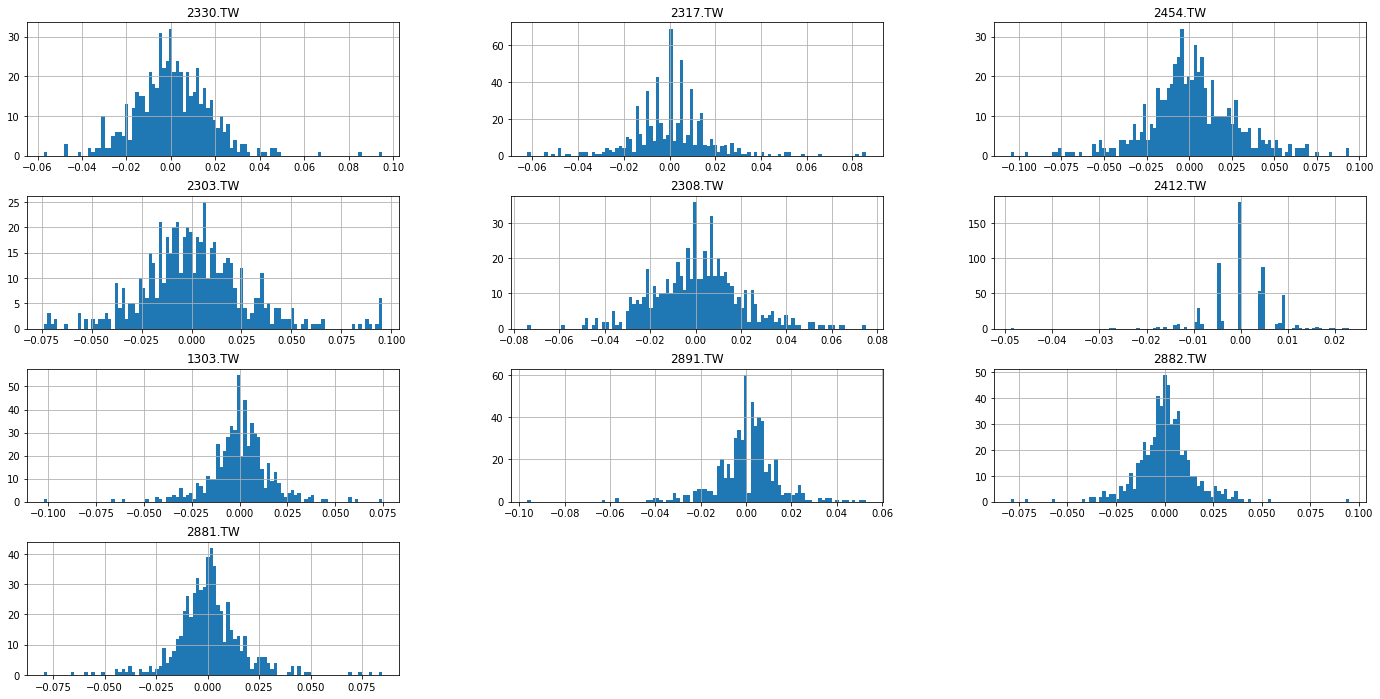

In [ ]:
log_return.hist(bins=100,figsize=(24,12))

In [ ]:
log_return.describe()

,2330.TW,2317.TW,2454.TW,2303.TW,2308.TW,2412.TW,1303.TW,2891.TW,2882.TW,2881.TW
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,571.000000,572.000000,572.000000
mean,0.000815,0.000542,0.001556,0.002006,0.000835,0.000247,0.000326,0.000243,0.000486,0.000714
std,0.016965,0.017336,0.026241,0.026929,0.019804,0.006750,0.015765,0.014198,0.014599,0.016534
min,-0.057158,-0.062181,-0.104550,-0.073870,-0.074108,-0.048790,-0.102396,-0.096425,-0.079013,-0.079553
25%,-0.009064,-0.008974,-0.012429,-0.013544,-0.011672,-0.004396,-0.006965,-0.005181,-0.006709,-0.007726
50%,0.000000,0.000000,0.000000,0.000000,0.000841,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.011406,0.009259,0.015431,0.015850,0.011705,0.004494,0.007941,0.006606,0.007384,0.008083
max,0.095075,0.085823,0.093982,0.095310,0.074883,0.023096,0.074522,0.052798,0.095030,0.084722


In [ ]:
log_return.corr()

,2330.TW,2317.TW,2454.TW,2303.TW,2308.TW,2412.TW,1303.TW,2891.TW,2882.TW,2881.TW
2330.TW,1.000000,0.448045,0.522503,0.454292,0.537891,0.171099,0.500092,0.420130,0.421090,0.424096
2317.TW,0.448045,1.000000,0.415309,0.345747,0.379128,0.235252,0.507325,0.404313,0.448731,0.413991
2454.TW,0.522503,0.415309,1.000000,0.397930,0.406408,0.178890,0.408847,0.342613,0.329586,0.310090
2303.TW,0.454292,0.345747,0.397930,1.000000,0.343460,0.040952,0.316887,0.224953,0.296278,0.253059
2308.TW,0.537891,0.379128,0.406408,0.343460,1.000000,0.135936,0.439761,0.369833,0.380506,0.387691
2412.TW,0.171099,0.235252,0.178890,0.040952,0.135936,1.000000,0.345417,0.284733,0.264540,0.286174
1303.TW,0.500092,0.507325,0.408847,0.316887,0.439761,0.345417,1.000000,0.678104,0.638255,0.630435
2891.TW,0.420130,0.404313,0.342613,0.224953,0.369833,0.284733,0.678104,1.000000,0.671312,0.691374
2882.TW,0.421090,0.448731,0.329586,0.296278,0.380506,0.264540,0.638255,0.671312,1.000000,0.860384
2881.TW,0.424096,0.413991,0.310090,0.253059,0.387691,0.286174,0.630435,0.691374,0.860384,1.000000


In [ ]:
plt.figure(figsize=(12,9))

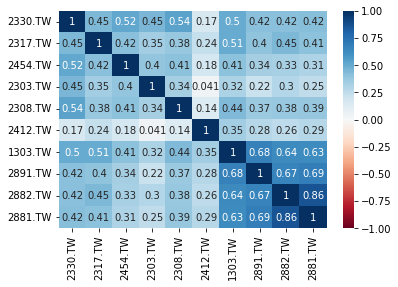

In [ ]:
s = sns.heatmap(log_return.corr(),
                annot = True,
                cmap ='RdBu',
                vmin= -1,
                vmax= 1)

In [ ]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [ ]:
# Calculate expected returnsg 預期收益率 and sample covariance 樣本共變異數
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  

# saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('2330.TW', 0.0), ('2317.TW', 0.0), ('2454.TW', 0.18949), ('2303.TW', 0.41742), ('2308.TW', 0.0), ('2412.TW', 0.31862), ('1303.TW', 0.0), ('2891.TW', 0.0), ('2882.TW', 0.0), ('2881.TW', 0.07447)])
Expected annual return: 40.1%
Annual volatility: 23.7%
Sharpe Ratio: 1.61


(0.40077820839965744, 0.2369344804327141, 1.6071033971258262)

檢查係數相加是否為1

In [ ]:
0.18949+0.41742+0.31862+0.07447

1.0

進行回測

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights=cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=30000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'2454.TW': 6, '2303.TW': 244, '2412.TW': 77, '2881.TW': 36}
Funds remaining: $37.80
